In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Loading Data

In [2]:
cancer = pd.read_csv('cancer.csv')

In [3]:
cancer.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      569 non-null    float64
 1   V2      569 non-null    float64
 2   V3      569 non-null    float64
 3   V4      569 non-null    float64
 4   V5      569 non-null    float64
 5   V6      569 non-null    float64
 6   V7      569 non-null    float64
 7   V8      569 non-null    float64
 8   V9      569 non-null    float64
 9   V10     569 non-null    float64
 10  V11     569 non-null    float64
 11  V12     569 non-null    float64
 12  V13     569 non-null    float64
 13  V14     569 non-null    float64
 14  V15     569 non-null    float64
 15  V16     569 non-null    float64
 16  V17     569 non-null    float64
 17  V18     569 non-null    float64
 18  V19     569 non-null    float64
 19  V20     569 non-null    float64
 20  V21     569 non-null    float64
 21  V22     569 non-null    float64
 22  V2

In [5]:
cancer['Class'].value_counts()

1    357
2    212
Name: Class, dtype: int64

In [6]:
X = cancer.drop(['Class'],axis=1)

In [8]:
y = cancer['Class']

#Train And Test Splitting

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


#Feature Scaling

In [10]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

#Model

In [34]:
#Building Model
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)  

KNeighborsClassifier()

In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

y_train_pred = knn.predict(X_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = knn.predict(X_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")


Metrics on Train samples
confusion_matrix: 
 [[286   0]
 [  9 160]]
classification_report: 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98       286
           2       1.00      0.95      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

Metrics on Test samples 
confusion_matrix: 
 [[68  3]
 [ 3 40]]
classification_report: 
               precision    recall  f1-score   support

           1       0.96      0.96      0.96        71
           2       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#Plotting Error for Neighbors

In [43]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    print(i , " " ,np.mean(pred_i != y_test))
    error.append(np.mean(pred_i != y_test))

1   0.06140350877192982
2   0.05263157894736842
3   0.05263157894736842
4   0.043859649122807015
5   0.05263157894736842
6   0.043859649122807015
7   0.05263157894736842
8   0.043859649122807015
9   0.03508771929824561
10   0.043859649122807015
11   0.043859649122807015
12   0.043859649122807015
13   0.043859649122807015
14   0.043859649122807015
15   0.043859649122807015
16   0.05263157894736842
17   0.05263157894736842
18   0.05263157894736842
19   0.05263157894736842
20   0.05263157894736842
21   0.05263157894736842
22   0.05263157894736842
23   0.05263157894736842
24   0.05263157894736842
25   0.05263157894736842
26   0.05263157894736842
27   0.05263157894736842
28   0.043859649122807015
29   0.043859649122807015
30   0.043859649122807015
31   0.043859649122807015
32   0.043859649122807015
33   0.043859649122807015
34   0.043859649122807015
35   0.043859649122807015
36   0.043859649122807015
37   0.043859649122807015
38   0.043859649122807015
39   0.043859649122807015


Text(0, 0.5, 'Mean Error')

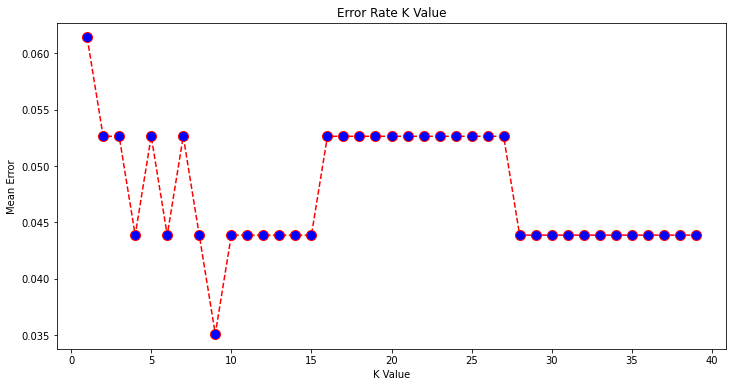

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

#Using cross-validation

In [23]:
# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=5) for KNN (the n_neighbors parameter)
# instantiate model
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
# use average accuracy as an estimate of out-of-sample accuracy
# scores is a numpy array so we can use the mean method
print("Mean Score:  ",scores.mean())

[0.9122807  0.87719298 0.89473684 0.96491228 0.94736842 0.92982456
 0.96491228 0.92982456 0.9122807  0.96428571]
Mean Score:   0.9297619047619046


#An optimal value of K for KNN

In [26]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    print("K : ",k," Score: ",scores.mean())
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print("\nK_Scores : \n")
print(k_scores)
sum = 0
for i in range(len(k_scores)):
  sum += k_scores[i]
  
print("Mean Score:  ",sum/len(k_scores))

K :  1  Score:  0.9156954887218045
K :  2  Score:  0.9121240601503761
K :  3  Score:  0.9261904761904761
K :  4  Score:  0.9227130325814535
K :  5  Score:  0.9297619047619046
K :  6  Score:  0.9297619047619048
K :  7  Score:  0.9279761904761905
K :  8  Score:  0.924436090225564
K :  9  Score:  0.9262531328320801
K :  10  Score:  0.9227130325814535
K :  11  Score:  0.9297619047619046
K :  12  Score:  0.9279761904761903
K :  13  Score:  0.9315162907268169
K :  14  Score:  0.9332706766917293
K :  15  Score:  0.9297619047619046
K :  16  Score:  0.9297305764411027
K :  17  Score:  0.9297619047619048
K :  18  Score:  0.9279761904761905
K :  19  Score:  0.9315162907268169
K :  20  Score:  0.9297619047619048
K :  21  Score:  0.9297619047619048
K :  22  Score:  0.9280075187969924
K :  23  Score:  0.9280075187969924
K :  24  Score:  0.9280075187969924
K :  25  Score:  0.9280075187969924
K :  26  Score:  0.9244987468671679
K :  27  Score:  0.9244987468671679
K :  28  Score:  0.9227130325814537
K 

Text(0, 0.5, 'Cross-Validated Accuracy')

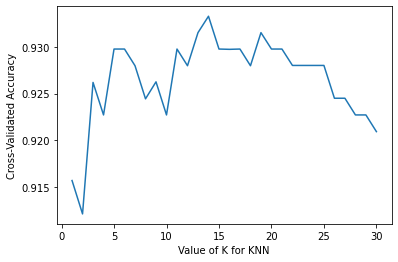

In [27]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#Using GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)
print(param_grid)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X, y)


print("Grid Score: ",grid.score(X, y))

#Sorted Grid keys
print(sorted(grid.cv_results_.keys()))

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
Grid Score:  0.9402460456942003
['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_n_neighbors', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


In [29]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.9332706766917293
{'n_neighbors': 14}
KNeighborsClassifier(n_neighbors=14)


#Using RandomizedSearchCV

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from time import time

weight_options = ['distance','uniform']

# specify "parameter distributions" rather than a "parameter grid"

# since both parameters are discrete, so param_dist is the same as param_grid
param_dist = dict(n_neighbors=k_range, weights=weight_options)

# if parameters are continuous (like regularization)

# n_iter controls the number of searches

# instantiate model
# 2 new params
# n_iter --> controls number of random combinations it will try
# random_state for reproducibility 
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)

# fit
rand.fit(X, y)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


start = time()
n_iter_search = 20

print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(rand.cv_results_)

RandomizedSearchCV took 0.00 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.930 (std: 0.038)
Parameters: {'weights': 'distance', 'n_neighbors': 22}

Model with rank: 2
Mean validation score: 0.930 (std: 0.037)
Parameters: {'weights': 'distance', 'n_neighbors': 18}

Model with rank: 3
Mean validation score: 0.930 (std: 0.037)
Parameters: {'weights': 'uniform', 'n_neighbors': 16}

Model with rank: 3
Mean validation score: 0.930 (std: 0.033)
Parameters: {'weights': 'distance', 'n_neighbors': 14}

